# Text Mining - Generate Document Term Metrics
-Dhameem

In [1]:
#import all required libraries
from nltk.corpus import reuters
from nltk import FreqDist
import nltk
import string
from nltk.corpus import stopwords
import matplotlib
%matplotlib inline

In [2]:
#For only one time use below
#nltk.download()

In [3]:
#we can try reuters corpus in NLTK
len(reuters.fileids())

10788

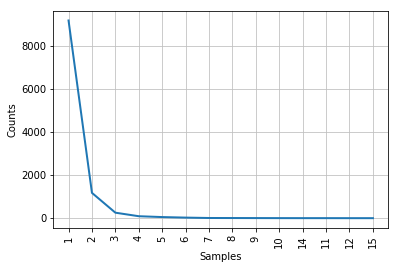

In [4]:
#get number of categories in the corpus
cats = [ reuters.categories(f) for f in reuters.fileids() ]
cat_num = [ len(c) for c in cats ]
fd_num = FreqDist(cat_num)
fd_num.plot()

In [5]:
#lets try to flatten the list of categories
cats_flat = [ c for l in cats for c in l ]

In [6]:
#apply Frequency Distribution and get top 20 words
fd_cat = FreqDist(cats_flat)
fd_cat
fd_cat.most_common(20)

[('earn', 3964),
 ('acq', 2369),
 ('money-fx', 717),
 ('grain', 582),
 ('crude', 578),
 ('trade', 485),
 ('interest', 478),
 ('ship', 286),
 ('wheat', 283),
 ('corn', 237),
 ('dlr', 175),
 ('money-supply', 174),
 ('oilseed', 171),
 ('sugar', 162),
 ('coffee', 139),
 ('gnp', 136),
 ('veg-oil', 124),
 ('gold', 124),
 ('soybean', 111),
 ('nat-gas', 105)]

In [7]:
# Let's pick two categories and visualize the articles in each category using word cloud
grain = reuters.fileids('grain')
trade = reuters.fileids('trade')

In [8]:
grain_tok = [ reuters.words(f) for f in grain ] 
trade_tok = [ reuters.words(f) for f in trade ] 

In [9]:
#lets get the stopword and stemmer. we will use SnowBall Stemmer
stop = stopwords.words('english')
snowball = nltk.SnowballStemmer('english')

In [11]:
def preprocess(toks):    
    toks = [ t.lower() for t in toks if t not in string.punctuation ]
    toks = [t for t in toks if t not in stop ]
    toks = [ snowball.stem(t) for t in toks ]
#    toks = [ wnl.lemmatize(t) for t in toks ]
    toks_clean = [ t for t in toks if len(t) >= 3 ]
    return toks_clean

In [12]:
# Preprocess each file in each category
grain_clean = [ preprocess(f) for f in grain_tok ]
trade_clean = [ preprocess(f) for f in trade_tok ]

In [13]:
# Flatten the list of lists for FreqDist
grain_flat = [ c for l in grain_clean for c in l ]
trade_flat = [ c for l in trade_clean for c in l ]

In [14]:
#lets try to get the frequency distribution
fd_grain = FreqDist(grain_flat)
fd_trade = FreqDist(trade_flat)

In [15]:
#lets try to install WordCloud
!pip install wordcloud

    100% |████████████████████████████████| 163kB 5.3MB/s 
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
# Generate word clouds for the two categories.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

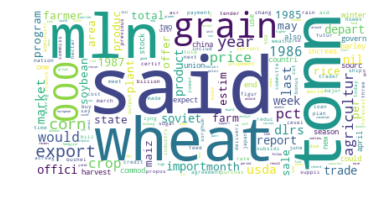

In [17]:
wc_grain = WordCloud(background_color="white").generate_from_frequencies(fd_grain)
plt.imshow(wc_grain, interpolation='bilinear')
plt.axis("off")
plt.show()

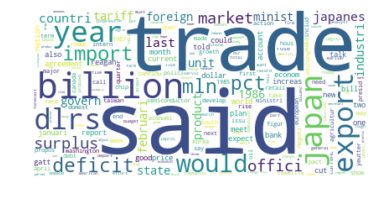

In [18]:
wc_trade = WordCloud(background_color="white").generate_from_frequencies(fd_trade)
plt.imshow(wc_trade, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
# sklearn requires the input to be text string
grain_text = [ ' '.join(f) for f in grain_clean ]

In [21]:
# Create a matrix using term frequency first using CountVectorizer
# The result is in sparse matrix format
vec_tf = CountVectorizer()
grain_tf = vec_tf.fit_transform(grain_text)
grain_tf

<582x4816 sparse matrix of type '<class 'numpy.int64'>'
	with 36794 stored elements in Compressed Sparse Row format>

In [22]:
#582= number of documets or rows , 4816 = columns, 36794 = sparse vector learned on the lecture
# Where are the columns and rows then?
vec_tf.get_feature_names() # words representing columns
grain_tf_m = grain_tf.toarray() # 

In [23]:
vec_tf_2 = CountVectorizer(min_df = 2) # document frequency = the unique # of documtns containing this word
grain_tf_2 = vec_tf_2.fit_transform(grain_text)
grain_tf_2

<582x2847 sparse matrix of type '<class 'numpy.int64'>'
	with 34825 stored elements in Compressed Sparse Row format>

In [24]:
# To have binary indexing, set "binary=True"
vec_bin = CountVectorizer(binary=True)
grain_bin = vec_bin.fit_transform(grain_text)
grain_bin.toarray()[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
# And tfidf indexing
vec_tfidf = TfidfVectorizer(min_df = 2)
grain_tfidf = vec_tfidf.fit_transform(grain_text)
grain_tfidf
grain_tfidf.toarray()[:10] #0.14944415 = this is the TF IDF for this document

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14944415,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [29]:
import pickle

In [30]:
# To save the vectorized results for future use
import pickle
pickle.dump(grain_tfidf, open("tfidf.pkl", "wb"))
pickle.dump(vec_tfidf.vocabulary_, open("feature.pkl","wb"))

In [33]:
#load the content
loaded_vec = TfidfVectorizer(decode_error="replace",vocabulary=pickle.load(open("./feature.pkl", "rb")))
tfidf = pickle.load(open("./tfidf.pkl", "rb" ) )
tfidf

<582x2847 sparse matrix of type '<class 'numpy.float64'>'
	with 34825 stored elements in Compressed Sparse Row format>